# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
lista1 = []

for i in sinasc_raw['munResLat']:
    if (i > -10.5):
        classificacao1 = "Lat. Acima"
    else:
        classificacao1 = "Lat. Abaixo"
    lista1.append(classificacao1)

In [5]:
sinasc_1 = sinasc_raw
sinasc_1['ClassLat'] = lista1

In [6]:
sinasc_1.groupby('ClassLat')[['QTDFILVIVO','QTDFILMORT']].agg(['sum', 'mean','min','max','median','std','var'])

QTDFILVIVO                                                  \
                   sum      mean  min   max median       std       var   
ClassLat                                                                 
Lat. Abaixo    12601.0  0.980012  0.0  30.0    1.0  1.138256  1.295626   
Lat. Acima     14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674   

            QTDFILMORT                                                 
                   sum     mean  min   max median       std       var  
ClassLat                                                               
Lat. Abaixo     3106.0  0.24258  0.0  28.0    0.0  0.599444  0.359333  
Lat. Acima      3538.0  0.29177  0.0   9.0    0.0  0.627856  0.394204

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
lista2 = []

for i in sinasc_raw['munResArea']:
    if (i > 3000):
        classificacao2 = "Area Acima"
    else:
        classificacao2 = "Area Abaixo"
    lista2.append(classificacao2)

In [8]:
sinasc_2 = sinasc_raw
sinasc_2['ClassArea'] = lista2

In [9]:
sinasc_2.groupby('ClassArea')[['IDADEMAE','IDADEPAI']].agg(['sum', 'mean','min','max','median','std','var'])

IDADEMAE                                                 IDADEPAI  \
                 sum       mean min max median       std        var       sum   
ClassArea                                                                       
Area Abaixo   137413  26.324330  11  53   26.0  6.305013  39.753192   78096.0   
Area Acima    567848  26.038518  12  53   25.0  6.405497  41.030387  158424.0   

                                                                
                  mean   min   max median       std        var  
ClassArea                                                       
Area Abaixo  31.089172  16.0  69.0   30.0  7.676090  58.922352  
Area Acima   31.094014  15.0  86.0   30.0  7.818364  61.126809

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
lista3 = []

for i in sinasc_raw['munResAlt']:
    if (i > 400):
        classificacao3 = "Alt. Acima"
    else:
        classificacao3 = "Alt. Abaixo"
    lista3.append(classificacao3)

In [11]:
sinasc_3 = sinasc_raw
sinasc_3['ClassAlt'] = lista3

In [12]:
sinasc_3.groupby('ClassAlt')[['PESO','CONSULTAS']].agg(['sum', 'mean','min','max','median','std','var'])

PESO                                              \
                  sum         mean  min   max  median         std   
ClassAlt                                                            
Alt. Abaixo  81829233  3244.102165  285  5985  3270.0  543.542577   
Alt. Acima    5827724  3230.445676  258  4920  3275.0  561.420051   

                           CONSULTAS                                     \
                       var       sum      mean min max median       std   
ClassAlt                                                                  
Alt. Abaixo  295438.532757     89865  3.562678   1   9    4.0  0.796628   
Alt. Acima   315192.473475      6798  3.768293   1   9    4.0  0.634184   

                       
                  var  
ClassAlt               
Alt. Abaixo  0.634615  
Alt. Acima   0.402189

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [13]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [14]:
#Criando a tabela e configurando a data
sinasc_4 = sinasc_raw[['IDADEMAE','munResNome','DTNASC']]
sinasc_4.loc[:,'DTNASC'] = pd.to_datetime(sinasc_4['DTNASC'])

In [15]:
#Colocando a data como índice
sinasc_4.set_index('DTNASC', inplace=True)

In [16]:
#Trocando o nome dos municípios pelas imediatas
sinasc_4['munResNome'] = sinasc_4['munResNome'].map(imediatas)

C:\Users\berna\AppData\Local\Temp\ipykernel_3224\2475361531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_4['munResNome'] = sinasc_4['munResNome'].map(imediatas)


In [17]:
sinasc_4

,IDADEMAE,munResNome
DTNASC,,
2019-02-19,19,Cacoal
2019-02-21,29,Cacoal
2019-02-25,37,Cacoal
2019-03-20,30,Cacoal
2019-03-23,30,Cacoal
...,...,...
2019-12-13,32,Vilhena
2019-10-04,19,Vilhena
2019-08-02,24,Vilhena


In [18]:
# Criando as séries pedidas
porto_velho = sinasc_4[sinasc_4['munResNome'] == 'Porto Velho'].groupby('DTNASC')['IDADEMAE'].mean()
ariquemes = sinasc_4[sinasc_4['munResNome'] == 'Ariquemes'].groupby('DTNASC')['IDADEMAE'].mean()
jaru = sinasc_4[sinasc_4['munResNome'] == 'Jaru'].groupby('DTNASC')['IDADEMAE'].mean()
jiparana = sinasc_4[sinasc_4['munResNome'] == 'Ji-Paraná'].groupby('DTNASC')['IDADEMAE'].mean()
cacoal = sinasc_4[sinasc_4['munResNome'] == 'Cacoal'].groupby('DTNASC')['IDADEMAE'].mean()
vilhena = sinasc_4[sinasc_4['munResNome'] == 'Vilhena'].groupby('DTNASC')['IDADEMAE'].mean()

<Axes: xlabel='DTNASC'>

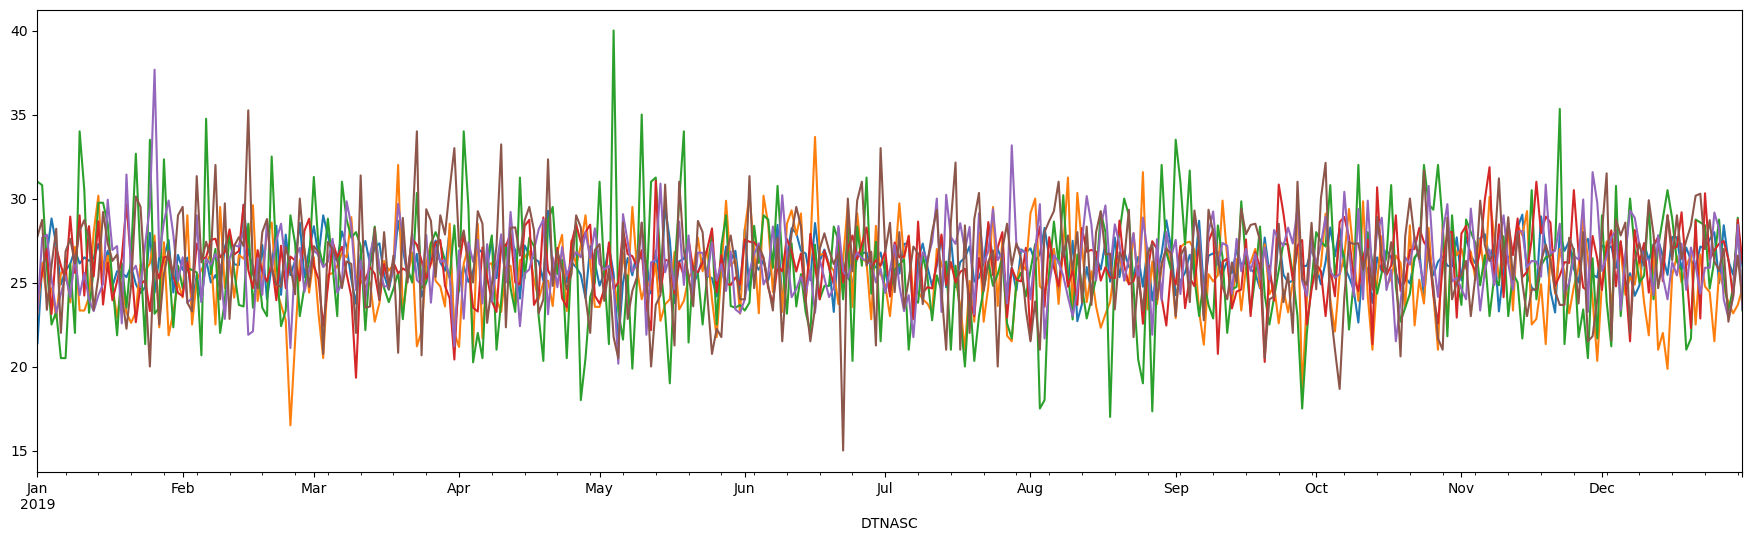

In [19]:
# Plotando
porto_velho.plot(figsize=[22,6])
ariquemes.plot()
jaru.plot()
jiparana.plot()
cacoal.plot()
vilhena.plot()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [20]:
IDH = {
    "Porto Velho": "IDH-M alto",
    "Vilhena": "IDH-M alto",
    "Cacoal": "IDH-M alto",
    "Ji-Paraná": "IDH-M alto",
    "Pimenta Bueno": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Rolim de Moura": "IDH-M alto",
    "Cerejeiras": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Espigão d'Oeste": "IDH-M médio",
    "Santa Luzia d'Oeste": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "Castanheiras": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Cabixi": "IDH-M médio",
    "Candeias do Jamari": "IDH-M médio",
    "São Felipe d'Oeste": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Mirante da Serra": "IDH-M médio",
    "Alvorada d'Oeste": "IDH-M médio",
    "Teixeirópolis": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Primavera de Rondônia": "IDH-M médio",
    "Alta Floresta d'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Alto Paraíso": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Buritis": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Cujubim": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    "Seringueiras": "IDH-M baixo",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho d'Oeste": "IDH-M baixo",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Nova União": "IDH-M baixo",
    "Nova Mamoré": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo",
}

In [21]:
sinasc_5 = sinasc_raw.set_index('munResNome')
sinasc_5.groupby(IDH)['PESO'].mean().to_frame()

,PESO
munResNome,
IDH-M alto,3245.623791
IDH-M baixo,3244.309955
IDH-M médio,3245.670333


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [22]:
IFDM  = {
    "Ariquemes": "Moderado",
    "Vilhena": "Moderado",
    "Pimenta Bueno": "Moderado",
    "Porto Velho": "Moderado",
    "Ji-Paraná": "Moderado",
    "Cacoal": "Moderado",
    "Santa Luzia d'Oeste": "Moderado",
    "Rolim de Moura": "Moderado",
    "Chupinguaia": "Moderado",
    "São Miguel do Guaporé": "Moderado",
    "Pimenteiras do Oeste": "Moderado",
    "Teixeirópolis": "Moderado",
    "Colorado do Oeste": "Moderado",
    "Jaru": "Moderado",
    "Rio Crespo": "Moderado",
    "Primavera de Rondônia": "Moderado",
    "Alta Floresta d'Oeste": "Moderado",
    "Ouro Preto do Oeste": "Moderado",
    "São Francisco do Guaporé	": "Moderado",
    "Candeias do Jamari": "Moderado",
    "Buritis": "Moderado",
    "São Felipe d'Oeste": "Moderado",
    "Presidente Médici": "Moderado",
    "Cerejeiras": "Moderado",
    "Monte Negro": "Moderado",
    "Urupá": "Moderado",
    "Espigão d'Oeste": "Regular",
    "Alvorada d'Oeste": "Regular",
    "Seringueiras": "Regular",
    "Itapuã do Oeste": "Regular",
    "Cabixi": "Regular",
    "Novo Horizonte do Oeste": "Regular",
    "Nova Brasilândia d'Oeste": "Regular",
    "Vale do Paraíso": "Regular",
    "Corumbiara": "Regular",
    "Alto Paraíso": "Regular",
    "Cacaulândia": "Regular",
    "Vale do Anari": "Regular",
    "Ministro Andreazza": "Regular",
    "Costa Marques": "Regular",
    "Nova União": "Regular",
    "Guajará-Mirim": "Regular",
    "Mirante da Serra": "Regular",
    "Parecis": "Regular",
    "Castanheiras": "Regular",
    "Theobroma": "Regular",
    "Machadinho d'Oeste": "Regular",
    "Campo Novo de Rondônia": "Regular",
    "Nova Mamoré": "Regular",
    "Cujubim": "Regular",
    "Alto Alegre dos Parecis": "Regular",
    "Governador Jorge Teixeira": "Regular",
}

In [23]:
sinasc_5.groupby([IFDM,'PARTO'])['PARTO'].count().to_frame()

PARTO
munResNome PARTO         
Moderado   Cesáreo  14016
           Vaginal   7065
Regular    Cesáreo   2317
           Vaginal   1343

In [24]:
7065/14016

0.5040667808219178

In [25]:
1343/2317

0.5796288303841174

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [26]:
PIB  = {
    "Porto Velho": "1. Acima de 1 Bilhão",
    "Ji-Paraná": "1. Acima de 1 Bilhão",
    "Vilhena": "1. Acima de 1 Bilhão",
    "Ariquemes": "1. Acima de 1 Bilhão",
    "Cacoal": "1. Acima de 1 Bilhão",
    "Jaru": "1. Acima de 1 Bilhão",
    "Rolim de Moura": "1. Acima de 1 Bilhão",
    "Pimenta Bueno": "1. Acima de 1 Bilhão",
    "Guajará-Mirim": "2. Acima de 500 Milhões",
    "Ouro Preto do Oeste": "2. Acima de 500 Milhões",
    "Buritis": "2. Acima de 500 Milhões",
    "Machadinho do Oeste": "2. Acima de 500 Milhões",
    "Espigão d'Oeste": "2. Acima de 500 Milhões",
    "São Miguel do Guaporé": "2. Acima de 500 Milhões",
    "Candeias do Jamari": "2. Acima de 500 Milhões",
    "Nova Mamoré": "2. Acima de 500 Milhões",
    "Cerejeiras": "2. Acima de 500 Milhões",
    "Alta Floresta do Oeste": "3. Acima de 300 Milhões",
    "Presidente Médici": "3. Acima de 300 Milhões",
    "Cujubim": "3. Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "3. Acima de 300 Milhões",
    "Alto Paraíso": "3. Acima de 300 Milhões",
    "São Francisco do Guaporé": "3. Acima de 300 Milhões",
    "Colorado do Oeste": "3. Acima de 300 Milhões",
    "Monte Negro": "4. Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "4. Acima de 200 Milhões",
    "Campo Novo de Rondônia": "4. Acima de 200 Milhões",
    "Alvorada do Oeste": "4. Acima de 200 Milhões",
    "Chupinguaia": "5. Acima de 100 Milhões",
    "Corumbiara": "5. Acima de 100 Milhões",
    "Ministro Andreazza": "5. Acima de 100 Milhões",
    "Urupá": "5. Acima de 100 Milhões",
    "Costa Marques": "5. Acima de 100 Milhões",
    "Seringueiras": "5. Acima de 100 Milhões",
    "Mirante da Serra": "5. Acima de 100 Milhões",
    "Governador Jorge Teixeira": "5. Acima de 100 Milhões",
    "Theobroma": "5. Acima de 100 Milhões",
    "Santa Luzia do Oeste": "5. Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "5. Acima de 100 Milhões",
    "Itapuã do Oeste": "5. Acima de 100 Milhões",
    "Vale do Paraíso": "5. Acima de 100 Milhões",
    "Cacaulândia": "5. Acima de 100 Milhões",
    "Cabixi": "5. Acima de 100 Milhões",
    "Vale do Anari": "5. Acima de 100 Milhões",
    "Nova União": "6. Até 100 Milhões",
    "Parecis": "6. Até 100 Milhões",
    "Rio Crespo": "6. Até 100 Milhões",
    "Pimenteiras do Oeste": "6. Até 100 Milhões",
    "Teixeirópolis": "6. Até 100 Milhões",
    "São Felipe do Oeste": "6. Até 100 Milhões",
    "Castanheiras": "6. Até 100 Milhões",
    "Primavera de Rondônia": "6. Até 100 Milhões",
}

In [27]:
sinasc_5.groupby(PIB).agg({'CONSULTAS': ['sum','count']})

CONSULTAS       
                              sum  count
munResNome                              
1. Acima de 1 Bilhão        62805  17736
2. Acima de 500 Milhões     11826   3354
3. Acima de 300 Milhões      4679   1252
4. Acima de 200 Milhões      1915    519
5. Acima de 100 Milhões      6944   1853
6. Até 100 Milhões           1402    377

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Descobri que:

- O peso médio dos bebês praticamente não tem variação independete de qual IDH estamos olhando.
- A porcentagem de partos vaginais é maior em cidade com IFDM "Regular" comparado a "Moderado".
- Há mais consultas pré-natais em cidades que tem o PIB na faixa de 200 a 100 milhões do que na faixa de 200 a 300 milhões.